In [60]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import wls
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.anova import anova_lm
from IPython.display import display, HTML

# Analysis 1:  Elementary Schools

In [61]:
#read result.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]
attendance

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
1,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
3,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
4,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
6,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
7,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
8,4555,Academy for Character Education,H,1,NaN,NaN,117.0
9,4555,Academy for Character Education,H,1,NaN,NaN,117.0


In [62]:
#We are interested in elementary school types (SchoolType == E, M, H)
attendance = attendance[attendance['SchoolType'] == 'E']
# Drop duplicates 
attendance = attendance.drop_duplicates()
# drop incomplete
attendance = attendance.dropna()
# create new 'number of program binary' (No_of_Program_b) that replaces No_of_Program with 0 -> 0
# and > 0 -> 1
attendance['No_of_Program_b'] = attendance['No_of_Program'].replace([1,2,3,4,5,6,7,8,9,10], 1)
# calculate the median
median = np.median(attendance['FrRedLnch_PercentEligible'])
# create new FrRedLnch_PercentEligible_hilo categorical variable where > median -> 1 else 0
attendance['FrRedLnch_PercentEligible_hilo'] = np.where(attendance['FrRedLnch_PercentEligible'] > median,1,0)
attendance

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment,No_of_Program_b,FrRedLnch_PercentEligible_hilo
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0,1,1
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0,1,0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0,1,0
17,27,Adams Elementary School,E,4,21.43,93.0,378.0,1,0
20,503,Adams Elementary School,E,7,40.54,87.2,444.0,1,0
26,707,Adrian Elementary School,E,1,67.20,88.9,186.0,1,1
35,694,Aiken Elementary School,E,2,80.80,89.5,276.0,1,1
38,823,Ainsworth Elementary School,E,5,5.67,95.0,582.0,1,0
44,692,Alameda Elementary School,E,2,86.00,90.9,407.0,1,1
47,824,Alameda Elementary School,E,3,7.82,94.9,767.0,1,0


In [58]:
# copy data and separate predictors and response
X = attendance.copy()
y = X.pop('PercentofStudentsNotChronicallyAbsent')
# print means for PercentofStudentsNotChronicallyAbsent grouped by No_of_Program_b (binary)
# these are so that we can check for a main effect of number of programs on attendance
y.groupby(X.No_of_Program_b).describe()

No_of_Program_b       
0                count     38.000000
                 mean      86.931579
                 std        5.520728
                 min       74.700000
                 25%       83.800000
                 50%       87.050000
                 75%       91.450000
                 max       95.000000
1                count    601.000000
                 mean      86.033111
                 std        5.691867
                 min       67.300000
                 25%       82.600000
                 50%       86.800000
                 75%       89.900000
                 max       95.000000
dtype: float64

## 0 Programs has higher mean than 1+ programs, but this may very well be because of the confounding effects of poverty...

In [59]:
# print means for PercentofStudentsNotChronicallyAbsent grouped by 
# FrRedLunch_PercentEligible_hilo 0 = below median, 1 = above median
# these are so that we can check for main effect of poverty
y.groupby(X.FrRedLnch_PercentEligible_hilo).describe()

FrRedLnch_PercentEligible_hilo       
0                               count    320.000000
                                mean      88.475938
                                std        4.735501
                                min       67.500000
                                25%       85.575000
                                50%       88.800000
                                75%       91.900000
                                max       95.000000
1                               count    319.000000
                                mean      83.689655
                                std        5.546197
                                min       67.300000
                                25%       79.800000
                                50%       84.200000
                                75%       87.900000
                                max       95.000000
dtype: float64

## Poverty does have a strong negative effect on attendance...
## 1 == >  median means more chronically absent

In [82]:
# print means for PercentofStudentsNotChronicallyAbsent grouped by 
# both FrRedLunch_PercentEligible_hilo 0 = below median, 1 = above median and No_of_Program_b (0 = 0, 1+ = 1)
# These are the individual cell means in the 2x2 table of poverty and programs
grouped = y.groupby([X.FrRedLnch_PercentEligible_hilo, X.No_of_Program_b])
grouped.describe()

FrRedLnch_PercentEligible_hilo  No_of_Program_b       
0                               0                count     25.000000
                                                 mean      88.344000
                                                 std        5.319311
                                                 min       74.700000
                                                 25%       85.200000
                                                 50%       88.400000
                                                 75%       93.200000
                                                 max       95.000000
                                1                count    295.000000
                                                 mean      88.487119
                                                 std        4.692595
                                                 min       67.500000
                                                 25%       85.600000
                                                

In [83]:
grouped.mean()

FrRedLnch_PercentEligible_hilo  No_of_Program_b
0                               0                  88.344000
                                1                  88.487119
1                               0                  84.215385
                                1                  83.667320
Name: PercentofStudentsNotChronicallyAbsent, dtype: float64

In [84]:
#present 2x2 matrix 
print("Mean of Attendance (higher number means better attendance)")
print("    Columns=Poverty (0=below median,1=above median")
print("    Rows=Programs (0=0 programs, 1=1+ programs)")

display(pd.DataFrame([[88.34, 84.22], [88.48, 83.68]]))

print("")
print("Poverty margins: 0 = 'low' = 88.48, 1 = 'high' = 83.69 meaning that higher poverty means less attendance")
print("Programs margins: 0 = '0 programs' = 86.93, 1 = '1+ programs' = 86.03")

Mean of Attendance (higher number means better attendance)
    Columns=Poverty (0=below median,1=above median
    Rows=Programs (0=0 programs, 1=1+ programs)


,0,1
0,88.34,84.22
1,88.48,83.68



Poverty margins: 0 = 'low' = 88.48, 1 = 'high' = 83.69 meaning that higher poverty means less attendance
Programs margins: 0 = '0 programs' = 86.93, 1 = '1+ programs' = 86.03


In [85]:
# compute ordinary least squares predicting attendance with 2 categorical variables
attendance_lm = ols('PercentofStudentsNotChronicallyAbsent ~ C(No_of_Program_b) * C(FrRedLnch_PercentEligible_hilo)', \
                    data=attendance).fit()
attendance_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.178
Model:                                               OLS   Adj. R-squared:                  0.174
Method:                                    Least Squares   F-statistic:                     45.80
Date:                                   Tue, 31 May 2016   Prob (F-statistic):           8.33e-27
Time:                                           11:35:00   Log-Likelihood:                -1953.7
No. Observations:                                    639   AIC:                             3915.
Df Residuals:                                        635   BIC:                             3933.
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         88.3440      1.033     85.544      0.000        86.316    90.372
C(No_of_Program_b)[T.1]                                            0.1431      1.076      0.133      0.894        -1.969     2.255
C(FrRedLnch_PercentEligible_hilo)[T.1]                            -4.1286      1.766     -2.338      0.020        -7.596    -0.661
C(No_of_Program_b)[T.1]:C(FrRedLnch_PercentEligible_hilo)[T.1]    -0.6912      1.815     -0.381      0.704        -4.256     2.873
==============================================================================
Omnibus:                       33.809   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.063
Skew:                          -0.557   Prob(JB):                     5.43e-09
Kurtosis:                       3.437   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The coefs above are in the predicted direction (negative for poverty, positive for num programs) but the P>|t| values indicate
## that only the main effect poverty is a large enough effect to be considered statistically significant.  Neither no_of_program_b 
## nor the interaction with poverty are statistically significant

In [86]:
from statsmodels.stats.anova import anova_lm
table10 = anova_lm(attendance_lm)
table10

,df,sum_sq,mean_sq,F,PR(>F)
C(No_of_Program_b),1.0,28.851070,28.851070,1.082056,2.986339e-01
C(FrRedLnch_PercentEligible_hilo),1.0,3631.124651,3631.124651,136.184953,1.206683e-28
C(No_of_Program_b):C(FrRedLnch_PercentEligible_hilo),1.0,3.865759,3.865759,0.144985,7.035021e-01
Residual,635.0,16931.122777,26.663185,NaN,NaN


## The anova confirms the same result:  Main effect of poverty on attendance is statistically significant, no_of_program_b nor
## Interaction are statistically significant

## Everything below this point is old analyses...kept around for reference


In [10]:
# show attendance group means for number of programs (0 or 1) 
#attendance['PercentofStudentsNotChronicallyAbsent'].groupBy(attendance['No_of_Program_b']).mean()

df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


In [ ]:
# copy data and separate predictors and response
X = attendance.copy()
#X
y = X.pop('PercentofStudentsNotChronicallyAbsent')
y
#df.head()
y.groupBy('')

In [9]:
# copy data and separate predictors and response
X = attendance.copy()
#X
y = X.pop('PercentofStudentsNotChronicallyAbsent')
y
#df.head()

row.names
1      1
2      1
3      0
4      1
5      1
6      0
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     0
15     0
16     0
17     0
18     1
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     1
27     0
28     1
29     0
30     1
      ..
434    0
435    0
436    0
437    0
438    0
439    0
440    0
441    0
442    0
443    0
444    0
445    0
446    0
447    0
448    1
449    0
450    0
451    1
452    0
453    0
454    0
455    1
456    1
457    1
458    0
459    0
460    1
461    0
462    0
463    1
Name: chd, dtype: int64

## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

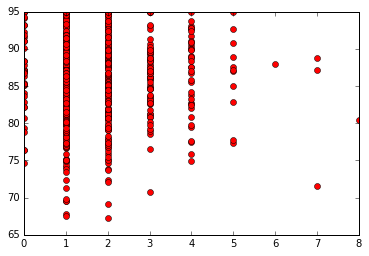

In [110]:
plt.plot(attendance['No_of_Program'], attendance['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows a positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

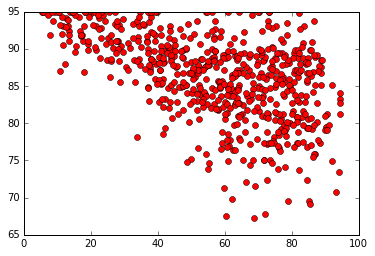

In [111]:
plt.plot(attendance['FrRedLnch_PercentEligible'], attendance['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

### We first remove the effect of poverty weighted by enrollment.  First, we weight only our poverty metric and leave programming at the school level.

In [112]:
#res = wls("PercentofStudentsNotChronicallyAbsent ~ FrRedLnch_PercentEligible_hilo", data=attendance, weights = attendance['Enrollment']).fit()
res = ols("PercentofStudentsNotChronicallyAbsent ~ FrRedLnch_PercentEligible_hilo", data=attendance).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.178
Model:                                               OLS   Adj. R-squared:                  0.176
Method:                                    Least Squares   F-statistic:                     137.7
Date:                                   Wed, 25 May 2016   Prob (F-statistic):           6.45e-29
Time:                                           22:03:45   Log-Likelihood:                -1953.8
No. Observations:                                    639   AIC:                             3912.
Df Residuals:                                        637   BIC:                             3920.
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [113]:
attendance.loc[:, 'Residual_Attendance_Rate'] = attendance['PercentofStudentsNotChronicallyAbsent'] - res.predict(attendance)

### Having computed the residual attendance based on the above model, we next fit those residuals to the program counts

In [114]:
res2 = ols("Residual_Attendance_Rate ~ No_of_Program", data=attendance).fit()
print(res2.summary())


                               OLS Regression Results                               
Dep. Variable:     Residual_Attendance_Rate   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                 -0.000
Method:                       Least Squares   F-statistic:                    0.8918
Date:                      Wed, 25 May 2016   Prob (F-statistic):              0.345
Time:                              22:03:51   Log-Likelihood:                -1953.3
No. Observations:                       639   AIC:                             3911.
Df Residuals:                           637   BIC:                             3920.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------

### Now we do that a second time, this time letting the weights apply both to poverty and programming

In [115]:
res3 = wls("PercentofStudentsNotChronicallyAbsent ~ FrRedLnch_PercentEligible + No_of_Program", data=attendance, weights = attendance['Enrollment']).fit()
print(res3.summary())


                                      WLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.316
Model:                                               WLS   Adj. R-squared:                  0.313
Method:                                    Least Squares   F-statistic:                     146.6
Date:                                   Wed, 25 May 2016   Prob (F-statistic):           4.40e-53
Time:                                           22:03:54   Log-Likelihood:                -1910.0
No. Observations:                                    639   AIC:                             3826.
Df Residuals:                                        636   BIC:                             3839.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

## Number of Programs predicting attendance (with Poverty removed)

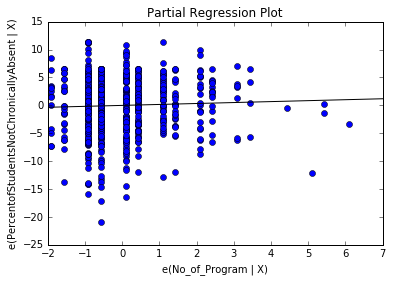

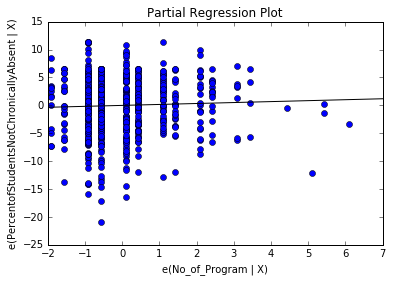

In [116]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible_hilo"], data=attendance, title_kwargs={}, obs_labels=False)

## Plot shows a positive best fit line between number of programs (No_of_Programs) predicting PercentofStudentsNotChronicallyAbsent (absenteeism)

# Analysis 2:  Elementary Schools

In [34]:
#read csv.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]

In [35]:
#We are only interested in elementary schools
elementary = attendance.query("SchoolType == 'E'").drop_duplicates()
# remove records with missing data
elementary = elementary.dropna()
elementary['No_of_Program'] = elementary['No_of_Program'].replace([1,2,3,4,5,6,7,8,9,10], 1)
elementary

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,1,41.73,89.7,496.0
17,27,Adams Elementary School,E,1,21.43,93.0,378.0
20,503,Adams Elementary School,E,1,40.54,87.2,444.0
26,707,Adrian Elementary School,E,1,67.20,88.9,186.0
35,694,Aiken Elementary School,E,1,80.80,89.5,276.0
38,823,Ainsworth Elementary School,E,1,5.67,95.0,582.0
44,692,Alameda Elementary School,E,1,86.00,90.9,407.0
47,824,Alameda Elementary School,E,1,7.82,94.9,767.0


## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

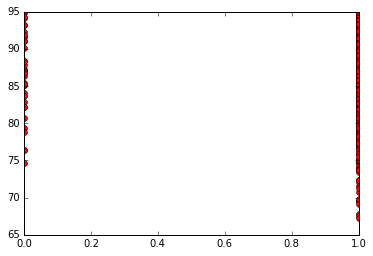

In [36]:
plt.plot(elementary['No_of_Program'], elementary['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows that there is positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

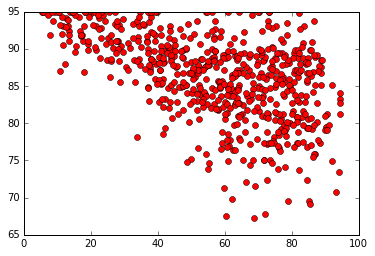

In [37]:
plt.plot(elementary['FrRedLnch_PercentEligible'], elementary['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

In [38]:
res = ols("PercentofStudentsNotChronicallyAbsent ~ No_of_Program + FrRedLnch_PercentEligible", data=elementary).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.278
Model:                                               OLS   Adj. R-squared:                  0.275
Method:                                    Least Squares   F-statistic:                     122.2
Date:                                   Wed, 25 May 2016   Prob (F-statistic):           1.27e-45
Time:                                           19:38:55   Log-Likelihood:                -1912.4
No. Observations:                                    639   AIC:                             3831.
Df Residuals:                                        636   BIC:                             3844.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

# Key Finding:  Number of programs (1-8) contributes positively to attendance (more programs means better attendance).  Coeficient of 0.2962 is marginally statistically significant (P>|t| = 0.077)

## Plot of Number of Programs predicting with Poverty removed 

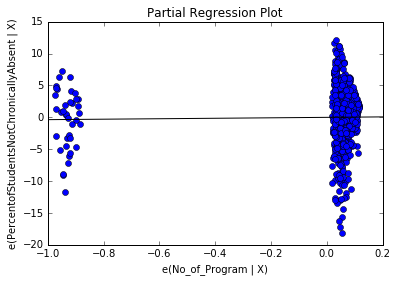

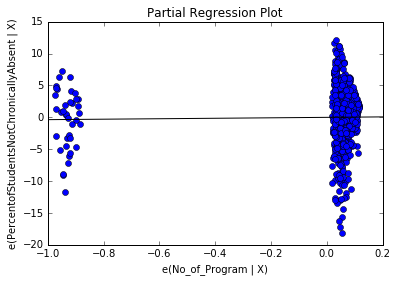

In [39]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=elementary, title_kwargs={}, obs_labels=False)

## These plots show a positive best fit line

# Analysis 3:  Middle Schools

In [40]:
#read csv.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]

In [41]:
#We are only interested in middle schools for this analysis
middle = attendance.query("SchoolType == 'M'").drop_duplicates()
# remove records with missing data
middle = middle.dropna()
middle['No_of_Program'] = middle['No_of_Program'].replace([1,2,3,4,5,6,7,8,9,10], 1)
middle

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
32,1353,Agnes Stewart Middle School,M,1,72.46,82.0,570.0
56,3530,Alder Creek Middle School,M,1,54.75,84.3,999.0
62,980,Alice Ott Middle School,M,1,74.12,91.8,711.0
95,1209,Amity Middle School,M,1,57.07,70.2,198.0
128,1039,Armand Larive Middle School,M,1,65.86,87.3,665.0
137,4554,Arts and Technology Academy at Jefferson,M,1,71.96,79.6,296.0
149,380,Ashland Middle School,M,1,42.16,78.6,574.0
157,144,Astoria Middle School,M,1,52.18,85.8,412.0
165,1287,Athey Creek Middle School,M,0,14.65,87.7,635.0
180,235,Azalea Middle School,M,1,62.94,80.9,367.0


## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

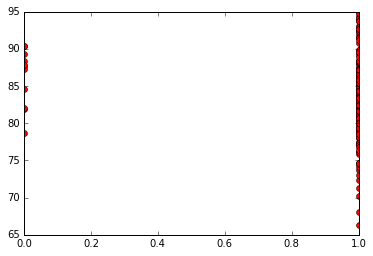

In [42]:
plt.plot(middle['No_of_Program'], middle['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows that there is positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

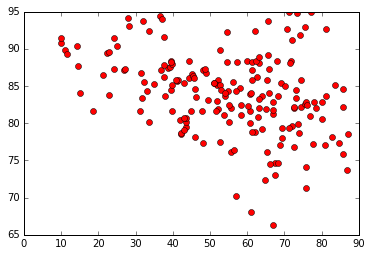

In [43]:
plt.plot(middle['FrRedLnch_PercentEligible'], middle['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

In [44]:
res = ols("PercentofStudentsNotChronicallyAbsent ~ No_of_Program + FrRedLnch_PercentEligible", data=middle).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.125
Model:                                               OLS   Adj. R-squared:                  0.115
Method:                                    Least Squares   F-statistic:                     13.06
Date:                                   Wed, 25 May 2016   Prob (F-statistic):           4.99e-06
Time:                                           19:38:57   Log-Likelihood:                -563.95
No. Observations:                                    186   AIC:                             1134.
Df Residuals:                                        183   BIC:                             1144.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

# This result is puzzeling.   The coeficients are both negative, meaning that both more programs and poverty negatively predict attendance (for middle schools only).   This could be an anomoly from the way that PercentofStudentNotChronicallyAbsent is measured.


## Plot of Number of Programs predicting with Poverty removed 

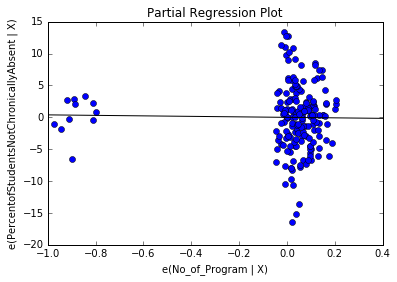

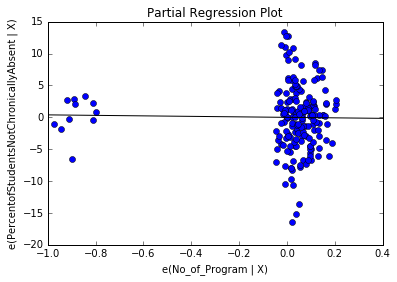

In [45]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=middle, title_kwargs={}, obs_labels=False)

## These plots show a negative best fit line.  ??

# Analysis 4:  High Schools

In [46]:
#read csv.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]

In [47]:
#We are only interested in high schools for this analysis
high = attendance.query("SchoolType == 'H'").drop_duplicates()
# remove records with missing data
high = high.dropna()
high['No_of_Program'] = high['No_of_Program'].replace([1,2,3,4,5,6,7,8,9,10], 1)
high

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
11,4440,Academy of Arts and Academics,H,1,55.68,68.7,352.0
14,4540,Academy of International Studies (at Woodburn),H,1,76.95,71.1,308.0
41,1791,Al Kennedy Alternative High School,H,1,82.93,30.6,82.0
50,3950,Albany Options School,H,1,33.86,57.3,381.0
71,4507,Alliance High School,H,1,57.31,50.4,171.0
74,1186,Aloha High School,H,1,56.56,71.9,2058.0
83,17,Alsea High School,H,1,57.50,62.0,80.0
92,1210,Amity High School,H,1,45.02,69.8,291.0
122,323,Arlington Community Charter School,H,1,66.91,72.0,136.0
125,3247,Armadillo Technical Institute,H,1,52.69,38.0,93.0


## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

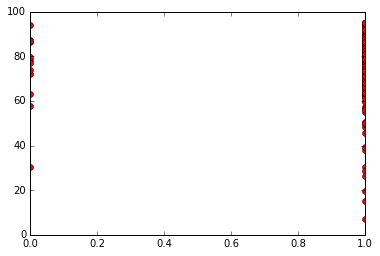

In [48]:
plt.plot(high['No_of_Program'], high['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows that there is positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

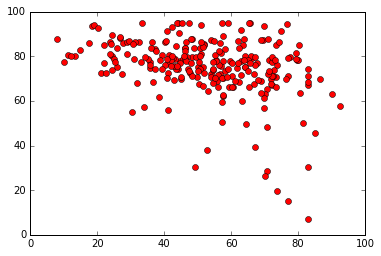

In [49]:
plt.plot(high['FrRedLnch_PercentEligible'], high['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

In [50]:
res = ols("PercentofStudentsNotChronicallyAbsent ~ No_of_Program + FrRedLnch_PercentEligible", data=high).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.125
Model:                                               OLS   Adj. R-squared:                  0.118
Method:                                    Least Squares   F-statistic:                     17.80
Date:                                   Wed, 25 May 2016   Prob (F-statistic):           5.90e-08
Time:                                           19:38:59   Log-Likelihood:                -998.63
No. Observations:                                    253   AIC:                             2003.
Df Residuals:                                        250   BIC:                             2014.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

# Although the coeficients are both in the expected direction (poverty negatively predicts attendance, and num of programs positively predicts attendance), the num of programs relationship is not significant (P>|t| = 0.452)


## Plot of Number of Programs predicting with Poverty removed 

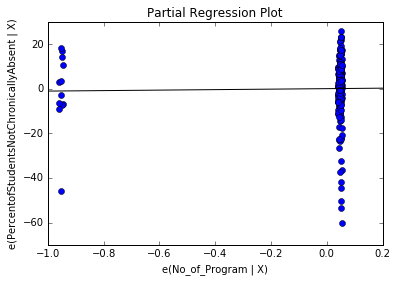

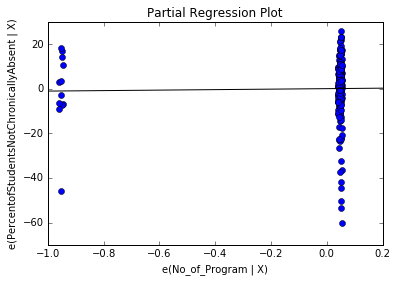

In [51]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=high, title_kwargs={}, obs_labels=False)

## These plots show a positive best fit line